In [1]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")

# Load your trained model and Dinov2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load Dinov2
model_name = 'dinov2_vitg14'
dinov2 = torch.hub.load('facebookresearch/dinov2', model_name).to(device)
dinov2.eval()

# Load your trained NN model


Mounted at /content/drive


Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitg14/dinov2_vitg14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitg14_pretrain.pth
100%|██████████| 4.23G/4.23G [01:07<00:00, 67.5MB/s]


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1536, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-39): 40 x NestedTensorBlock(
      (norm1): LayerNorm((1536,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=1536, out_features=4608, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1536, out_features=1536, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((1536,), eps=1e-06, elementwise_affine=True)
      (mlp): SwiGLUFFNFused(
        (w12): Linear(in_features=1536, out_features=8192, bias=True)
        (w3): Linear(in_features=4096, out_features=1536, bias=True)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (norm): LayerNorm((1536,), eps=1e-06, elementwise_affine=True)
  (head

In [ ]:
from torch import nn
input_dim = 768   # Adjust to match your NN input size
output_dim = 2   # Number of classes

class ImprovedNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)

        x = self.fc4(x)
        return x

trained_nn = ImprovedNN(input_dim, output_dim)
state_dict_path = "/content/drive/MyDrive/antispoofing/b14_LCC-train_3Layers"
trained_nn.load_state_dict(torch.load(state_dict_path, map_location=torch.device(device), weights_only = True))
trained_nn.eval()

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to Dinov2 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])



Test the best perfomance - model (also the most slow one)

In [3]:
from torch import nn
input_dim = 1536
output_dim = 2

class LargerNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LargerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

trained_nn = LargerNN(input_dim, output_dim)
state_dict_path = "/content/drive/MyDrive/antispoofing/modelg14_4l.pth"
trained_nn.load_state_dict(torch.load(state_dict_path, map_location=torch.device(device), weights_only = True))
trained_nn.eval()

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to Dinov2 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


<IPython.core.display.Javascript object>

Image saved to photo.jpg
Displaying image with bounding box...


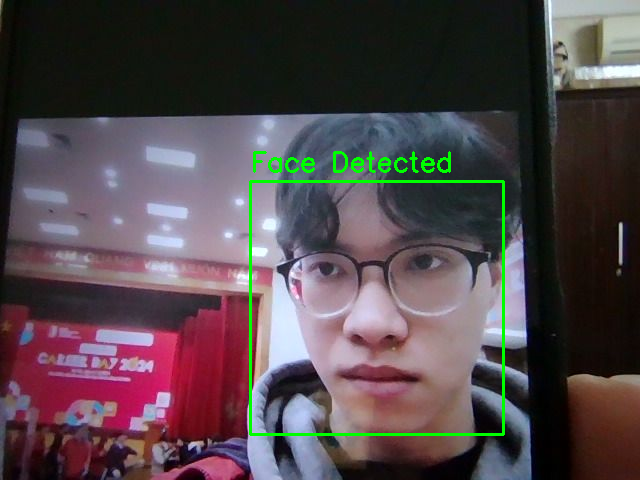

Predicted Class: Spoof, Confidence: 1.00


In [9]:
trained_nn.to(device)
def detect_and_crop_face(image_path, output_size=(224, 224), display_box=True):
    """
    Detects a face in the image, crops it, and optionally displays the bounding box.
    Returns the cropped face or None if no face is found.
    """
    # Load pre-trained face detector (Haar cascades)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    original_image = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected!")
        return None

    # Assume the first detected face is the one we want
    x, y, w, h = faces[0]
    cropped_face = image[y:y+h, x:x+w]

    if display_box:
        # Draw the bounding box on the image
        cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(
            original_image, "Face Detected", (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2
        )
        print("Displaying image with bounding box...")
        cv2_imshow(original_image)

    resized_face = cv2.resize(cropped_face, output_size)
    return resized_face

def process_and_infer(image_path):
    """
    Processes the image through face detection, Dinov2, and NN.
    Returns the predicted class and confidence score.
    """
    # Step 1: Detect and crop the face
    cropped_face = detect_and_crop_face(image_path)
    if cropped_face is None:
        return None, None, "No face detected."

    # Step 2: Preprocess the face
    pil_image = Image.fromarray(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    input_tensor = preprocess(pil_image).unsqueeze(0).to(device)

    # Step 3: Extract features using Dinov2
    with torch.no_grad():
        features = dinov2(input_tensor).cpu()

    # Step 4: Pass features to your trained NN
    with torch.no_grad():
        logits = trained_nn(features.to(device))
        probabilities = torch.softmax(logits, dim=1)
        confidence, predicted_class = torch.max(probabilities, dim=1)

    return int(predicted_class), float(confidence), None

# Capture an image from the webcam
def capture_and_infer():
    """
    Captures an image from the webcam and performs inference.
    """
    from IPython.display import display, Javascript
    from google.colab.output import eval_js
    from base64 import b64decode

    def take_photo(filename='photo.jpg', quality=0.8):
        js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const button = document.createElement('button');
            button.textContent = 'Capture';
            div.appendChild(video);
            div.appendChild(button);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Wait for the user to press the "Capture" button
            await new Promise((resolve) => button.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename

    try:
        # Capture a photo
        image_path = take_photo()
        print(f"Image saved to {image_path}")

        # Perform inference
        predicted_class, confidence, error = process_and_infer(image_path)
        if error:
            print(error)
        else:
            print(f"Predicted Class: {'Spoof' if predicted_class == 1 else 'Live'}, Confidence: {confidence:.2f}")
    except Exception as e:
        print(f"Error: {e}")

# Start the process
capture_and_infer()